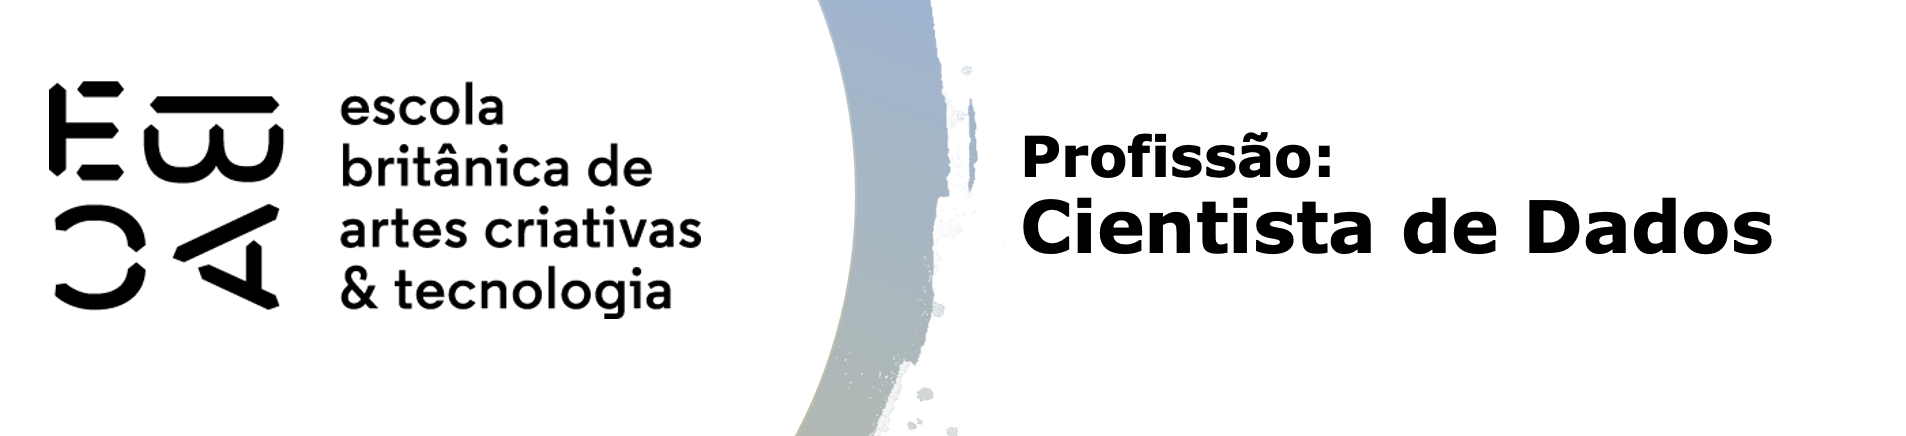

Módulo 21 <br> Professor: Lucas Serra 

# Módulo 21 - Atividade 3

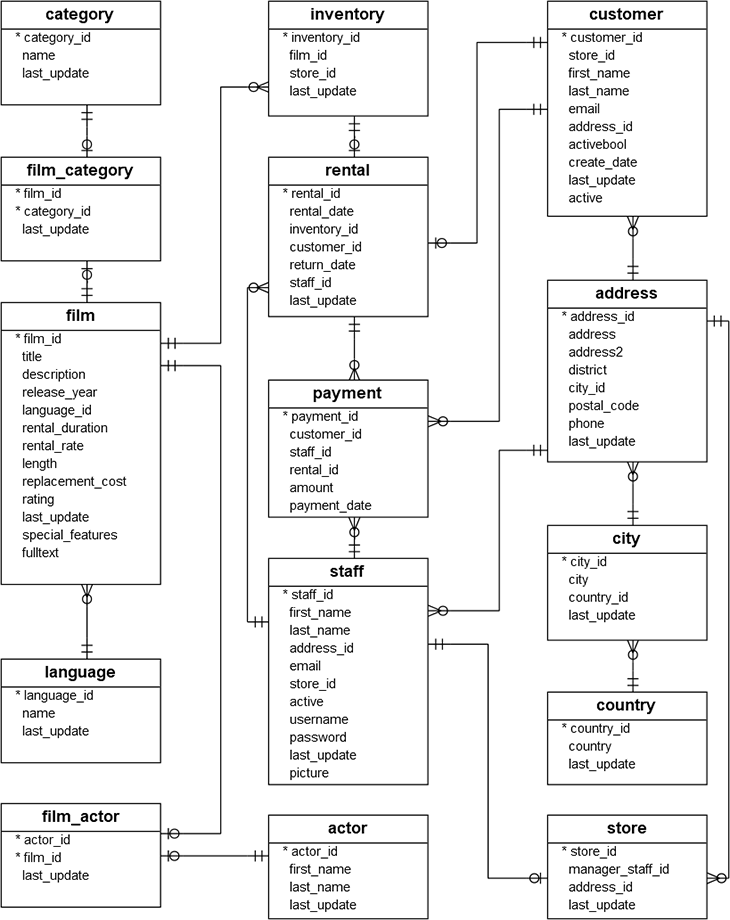

### Calcule a média por nome e sobrenome do ator da seguintes variáveis:
- rental_duration
- rental_rate
- length
- replacement_cost

Código SQL: 
```SQL
SELECT first_name, last_name, AVG(rental_duration) AS avg_duration, AVG(rental_rate) AS avg_rate, 
AVG(f.length) AS avg_length, AVG(replacement_cost) AS avg_cost
FROM actor AS a INNER JOIN film_actor as fa ON a.actor_id = fa.actor_id
INNER JOIN film AS f ON fa.film_id = f.film_id
GROUP BY first_name, last_name
```

Resposta SQL: 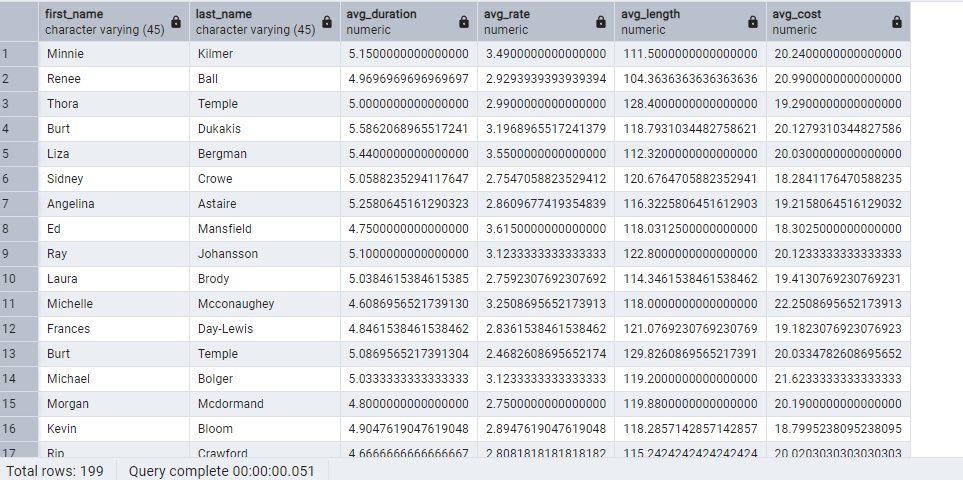

In [1]:
# Código em Python

import psycopg2 as pg2
import pandas as pd

In [2]:
# Conectando a base do 
conn = pg2.connect(host='localhost', port=5433, dbname='DvdRental', user='postgres',password='mape0927')

# Criando o cursor
cur = conn.cursor()

# Linhas de comando SQL
cur.execute("SELECT first_name, last_name, AVG(rental_duration) AS avg_duration, AVG(rental_rate) AS avg_rate, AVG(f.length) AS avg_length, AVG(replacement_cost) AS avg_cost FROM actor AS a INNER JOIN film_actor as fa ON a.actor_id = fa.actor_id INNER JOIN film AS f ON fa.film_id = f.film_id GROUP BY first_name, last_name")
conn.commit()
colnames = [desc.name for desc in cur.description]
data = cur.fetchall()

# Fechando a conexão
cur.close()
conn.close()

In [3]:
data

[('Minnie',
  'Kilmer',
  Decimal('5.1500000000000000'),
  Decimal('3.4900000000000000'),
  Decimal('111.5000000000000000'),
  Decimal('20.2400000000000000')),
 ('Renee',
  'Ball',
  Decimal('4.9696969696969697'),
  Decimal('2.9293939393939394'),
  Decimal('104.3636363636363636'),
  Decimal('20.9900000000000000')),
 ('Thora',
  'Temple',
  Decimal('5.0000000000000000'),
  Decimal('2.9900000000000000'),
  Decimal('128.4000000000000000'),
  Decimal('19.2900000000000000')),
 ('Burt',
  'Dukakis',
  Decimal('5.5862068965517241'),
  Decimal('3.1968965517241379'),
  Decimal('118.7931034482758621'),
  Decimal('20.1279310344827586')),
 ('Liza',
  'Bergman',
  Decimal('5.4400000000000000'),
  Decimal('3.5500000000000000'),
  Decimal('112.3200000000000000'),
  Decimal('20.0300000000000000')),
 ('Sidney',
  'Crowe',
  Decimal('5.0588235294117647'),
  Decimal('2.7547058823529412'),
  Decimal('120.6764705882352941'),
  Decimal('18.2841176470588235')),
 ('Angelina',
  'Astaire',
  Decimal('5.2580645

In [4]:
df = pd.DataFrame(data, columns = colnames)
df.head()

,first_name,last_name,avg_duration,avg_rate,avg_length,avg_cost
0,Minnie,Kilmer,5.1500000000000000,3.4900000000000000,111.5000000000000000,20.2400000000000000
1,Renee,Ball,4.9696969696969697,2.9293939393939394,104.3636363636363636,20.9900000000000000
2,Thora,Temple,5.0000000000000000,2.9900000000000000,128.4000000000000000,19.2900000000000000
3,Burt,Dukakis,5.5862068965517241,3.1968965517241379,118.7931034482758621,20.1279310344827586
4,Liza,Bergman,5.4400000000000000,3.5500000000000000,112.3200000000000000,20.0300000000000000


### Calcule a soma de amount (preço total do aluguel) por nome, sobrenome e email do cliente (customer) e indique os 10 clientes que mais gastaram e os 10 que menos gastaram.


10 que menos gastam
SQL: 
```SQL
SELECT c.first_name, c.last_name, c.email, SUM(p.amount) AS total FROM customer AS c 
INNER JOIN payment AS p ON c.customer_id = p.customer_id
GROUP BY c.first_name, c.last_name, c.email
ORDER BY total
LIMIT 10
````
Resposta:

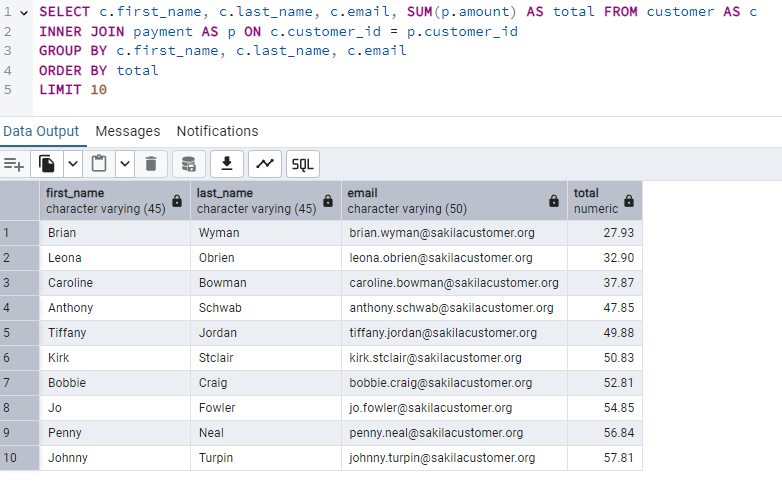

In [5]:
# Conectando a base do 
conn = pg2.connect(host='localhost', port=5433, dbname='DvdRental', user='postgres',password='mape0927')

# Criando o cursor
cur = conn.cursor()

# Linhas de comando SQL
cur.execute("SELECT c.first_name, c.last_name, c.email, SUM(p.amount) AS total FROM customer AS c  INNER JOIN payment AS p ON c.customer_id = p.customer_id GROUP BY c.first_name, c.last_name, c.email ORDER BY total")
conn.commit()
colnames = [desc.name for desc in cur.description]
data = cur.fetchall()

# Fechando a conexão
cur.close()
conn.close()

In [6]:
df = pd.DataFrame(data, columns = colnames)
# Menores 10 valores de pagos
df.head(10)

,first_name,last_name,email,total
0,Brian,Wyman,brian.wyman@sakilacustomer.org,27.93
1,Leona,Obrien,leona.obrien@sakilacustomer.org,32.90
2,Caroline,Bowman,caroline.bowman@sakilacustomer.org,37.87
3,Anthony,Schwab,anthony.schwab@sakilacustomer.org,47.85
4,Tiffany,Jordan,tiffany.jordan@sakilacustomer.org,49.88
5,Kirk,Stclair,kirk.stclair@sakilacustomer.org,50.83
6,Bobbie,Craig,bobbie.craig@sakilacustomer.org,52.81
7,Jo,Fowler,jo.fowler@sakilacustomer.org,54.85
8,Penny,Neal,penny.neal@sakilacustomer.org,56.84
9,Johnny,Turpin,johnny.turpin@sakilacustomer.org,57.81


10 que mais gastam
SQL: 
```SQL
SELECT c.first_name, c.last_name, c.email, SUM(p.amount) AS total FROM customer AS c 
INNER JOIN payment AS p ON c.customer_id = p.customer_id
GROUP BY c.first_name, c.last_name, c.email
ORDER BY total DESC
LIMIT 10
````
Resposta:

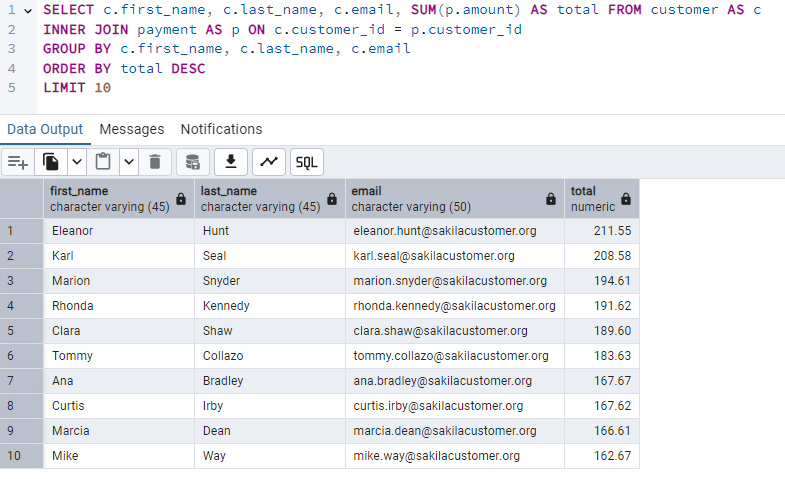

In [7]:
# Maiores 10 valores de pagos
df.tail(10)

,first_name,last_name,email,total
589,Mike,Way,mike.way@sakilacustomer.org,162.67
590,Marcia,Dean,marcia.dean@sakilacustomer.org,166.61
591,Curtis,Irby,curtis.irby@sakilacustomer.org,167.62
592,Ana,Bradley,ana.bradley@sakilacustomer.org,167.67
593,Tommy,Collazo,tommy.collazo@sakilacustomer.org,183.63
594,Clara,Shaw,clara.shaw@sakilacustomer.org,189.60
595,Rhonda,Kennedy,rhonda.kennedy@sakilacustomer.org,191.62
596,Marion,Snyder,marion.snyder@sakilacustomer.org,194.61
597,Karl,Seal,karl.seal@sakilacustomer.org,208.58
598,Eleanor,Hunt,eleanor.hunt@sakilacustomer.org,211.55
